In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from pandas_datareader import DataReader

In [4]:
from datetime import datetime

In [5]:
from __future__ import division

Pertanyaan-pertanyaan yang akan kita jawab: 

1.) What was the change in price of the stock over time?

2.) What was the daily return of the stock on average?

3.) What was the moving average of the various stocks?

4.) What was the correlation between different stocks' closing prices?

4.) What was the correlation between different stocks' daily returns?

5.) How much value do we put at risk by investing in a particular stock?

6.) How can we attempt to predict future stock behavior?

In [6]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [7]:
end = datetime.now()

#waktu dimulainya adalah satu tahun yang lalu dari waktu sekarang
start = datetime(end.year-1, end.month, end.day)

In [8]:
#looping ini mengubah value di dalam tech_list menjadi variabel global
#itu dimulai dari fungsi global()

# DataReader artinya membaca data, ada empat parameter
# parameter pertama stock name, atau mencari nama tersebut
# parameter kedua, mencari di mana baca data tersebut (dalam hal ini yahoo finance)
# parameter ketiga, dimulainya waktu
# parameter keempat, akhir dari waktu
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [9]:
#melihat saham dari Google 

# PENJELASAN TIAP KOLOM: 
#     HIGH artinya harga paling tinggi di hari yang bersangkutan
#     LOW artinya harga terendah dari hari yang bersangkutan
#     OPEN harga saat hari mulai berjalan
#     CLOSE harga saat hari ditutup 
#     VOLUME traded di hari yang bersangkutan (?)
#     ADJ CLOSE biasanya digunakan, melihat ada perubahan signifikan atau apalah terhadap saham ybs, masih tidak begitu ngerti juga
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-22,1249.089966,1228.310059,1235.989990,1248.839966,807300,1248.839966
2019-04-23,1269.000000,1246.380005,1250.689941,1264.550049,1319900,1264.550049
2019-04-24,1268.010010,1255.000000,1264.119995,1256.000000,1018800,1256.000000
2019-04-25,1267.407959,1252.030029,1264.770020,1263.449951,1107300,1263.449951
2019-04-26,1273.069946,1260.319946,1269.000000,1272.180054,1241400,1272.180054


In [10]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,245.075708,239.604252,242.036456,242.563700,3.325141e+07,241.510443
std,43.223838,41.955949,42.477706,42.823814,1.733137e+07,43.371263
min,177.919998,170.270004,175.440002,173.300003,1.136200e+07,171.719727
25%,206.455002,203.365005,204.317493,204.549999,2.167490e+07,202.629662
50%,237.889999,234.294998,235.724998,236.040001,2.782950e+07,234.776268
75%,278.330002,269.152496,273.072487,274.742493,3.804492e+07,274.253899
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,327.200012


In [11]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-04-22 to 2020-04-22
Data columns (total 6 columns):
High         254 non-null float64
Low          254 non-null float64
Open         254 non-null float64
Close        254 non-null float64
Volume       254 non-null float64
Adj Close    254 non-null float64
dtypes: float64(6)
memory usage: 13.9 KB


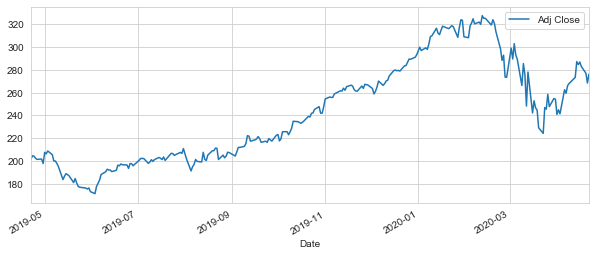

In [12]:
#melihat histrocial views dari adj close 
#pada dasarnya melihat saham apple selama satu tahun kebelakang
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

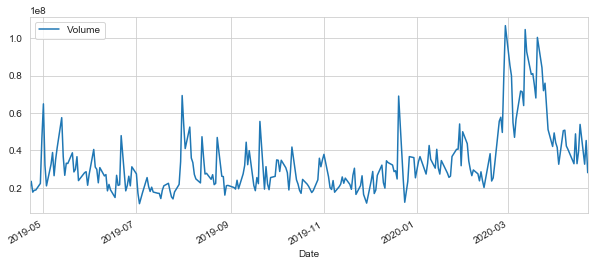

In [13]:
#melihat total volume dari saham yang di-trade tiap hari
#1e8 maksudnya adalah 10^8 (?)
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [14]:
#calculation moving average dari saham
#apa itu moving average? 

#dari skimming yang saya dapat, moving average digunakan untuk smoothing data yang didapat 
#dengan cara mengeliminasi short-term price yang tidak penting 

#lebih lanjut mengenai moving average: 
# https://www.investopedia.com/terms/m/movingaverage.asp
# https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [15]:
#menghitung several moving averages
#10 day moving average, 20 day moving average, dan 50 day ma 
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    #method rolling merupakan method pengganti rolling_mean, tapi apa itu rolling mean? 
    #menurut wikipedia, rolling mean sama artinya seperti moving averages 
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

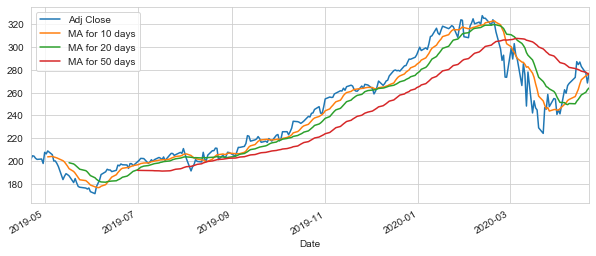

In [16]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(10,4))

#grafik menunjukkan semakin kita tarik moving average dengan semakin banyak waktu, garis akan semakin smooth 
#apakah moving average maksudnya average per sekian hari? 

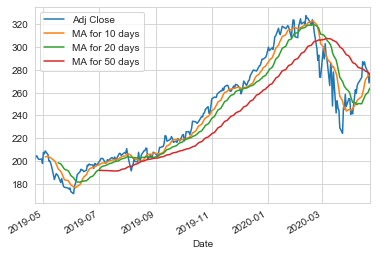

In [17]:
#saya baru sadar, saya masih tidak mengetahu apa kegunaan dari figsize
#jadi apa kegunaan dari figsize? 

#eksperimen tanpa figsize
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False)

#kemungkinan besar figsize adalah ukuran 

## Analisis Daily Return dan Risk dari Stock

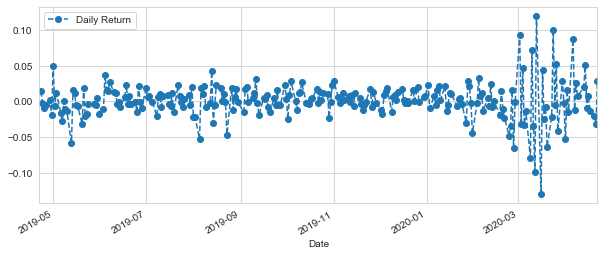

In [18]:
#membuat kolom baru 
#pct_change adalah perubahan dari satu kolom ke kolom yang lainnya 
#pct_change sepertinya bisa juga disebut sebagai daily return 
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

#melihat seberapa untung atau rugi dari saham yang kita beli, ini dilihat dari persentase per hari 
AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--', marker='o')

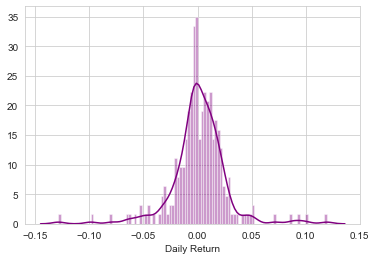

In [19]:
#average daily return for the past years
#distplot meletakkan plot on top of each other, dalam hal ini kde dan histogram

#sumbu y menandakan apa? sepertinya counts, atau ada berapa banyak 
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

#positively skewed? 

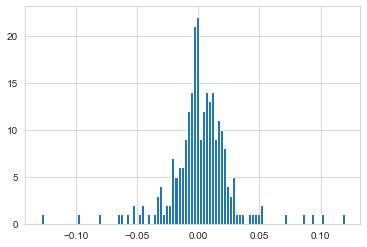

In [20]:
#bisa menggunakan method hist dari pandas
AAPL['Daily Return'].hist(bins=100)

In [21]:
#mengambil data dari yahoo finance akan tetapi cuma kolom Adj Close saja
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [22]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-04-22,201.887497,1887.310059,1248.839966,122.143959
2019-04-23,204.799362,1923.770020,1264.550049,123.802032
2019-04-24,204.483505,1901.750000,1256.000000,123.377647
2019-04-25,202.627808,1902.250000,1263.449951,127.463577
2019-04-26,201.660461,1950.630005,1272.180054,128.193909


In [23]:
tech_rets = closing_df.pct_change()

In [24]:
#baris pertama NaN which is make sense 
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-04-22,NaN,NaN,NaN,NaN
2019-04-23,0.014423,0.019318,0.012580,0.013575
2019-04-24,-0.001542,-0.011446,-0.006761,-0.003428
2019-04-25,-0.009075,0.000263,0.005931,0.033117
2019-04-26,-0.004774,0.025433,0.006910,0.005730


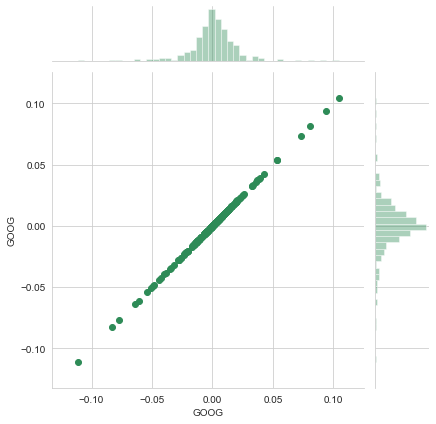

In [25]:
#apa kegunaan dari jointplot ini? udah jelas akan menghasilkan data yang linear bukan? 
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

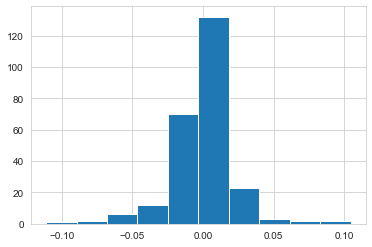

In [26]:
tech_rets['GOOG'].hist()

E:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


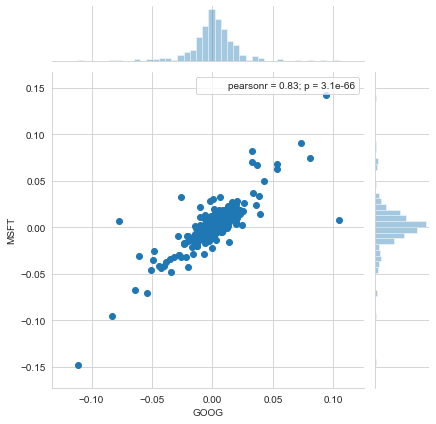

In [27]:
#compare to different stocks
#baik jointplot yang atas maupun yang bawah tidak menunjukkan pearson value 
#untuk menampilkan pearson r saya harus import library lain dulu, yaitu scipy 
#ignore warning untuk sekarang ini
import scipy.stats as stats
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter').annotate(stats.pearsonr)

#nilai korelasinya 0.83, artinya cukup kuat antara satu teknologi dengan teknologi yang lain 
#sepertinya memang tidak dilihat berdasarkan hari 

In [28]:
#dokumen lebih lanjut tentang pearson: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

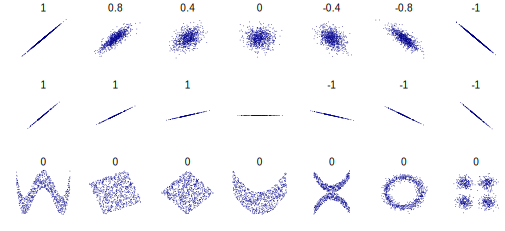

In [29]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

#keterangan visual mengenai pearson, karena kita 0.8 berarti seharusnya cukup correlated selama setahun belakangan 

In [30]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-04-22,NaN,NaN,NaN,NaN
2019-04-23,0.014423,0.019318,0.012580,0.013575
2019-04-24,-0.001542,-0.011446,-0.006761,-0.003428
2019-04-25,-0.009075,0.000263,0.005931,0.033117
2019-04-26,-0.004774,0.025433,0.006910,0.005730


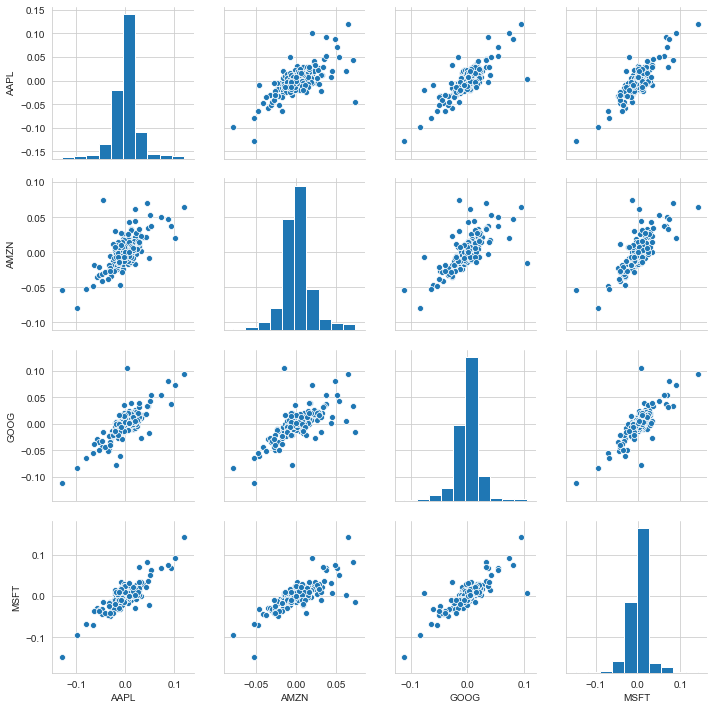

In [31]:
#melihat correlation dari semua kolom 
sns.pairplot(tech_rets.dropna())

#sepertinya terlihat hampir semua perusahaan memiliki correlation yang tinggi 

In [32]:
#melakukan kalkulasi pearson correlation
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-04-22,201.887497,1887.310059,1248.839966,122.143959
2019-04-23,204.799362,1923.770020,1264.550049,123.802032
2019-04-24,204.483505,1901.750000,1256.000000,123.377647
2019-04-25,202.627808,1902.250000,1263.449951,127.463577
2019-04-26,201.660461,1950.630005,1272.180054,128.193909


In [33]:
pearsoncorr = tech_rets.dropna().corr(method='pearson')

In [34]:
pearsoncorr
#semuanya diatas 0.4, berarti semua korelasinya tinggi 
#paling tinggi korelasi yaitu antara Amaon dan Microsoft

Symbols,AAPL,AMZN,GOOG,MSFT
Symbols,,,,
AAPL,1.000000,0.683878,0.796548,0.849658
AMZN,0.683878,1.000000,0.686198,0.761493
GOOG,0.796548,0.686198,1.000000,0.832202
MSFT,0.849658,0.761493,0.832202,1.000000


In [35]:
pearsoncorr.max()
#sepertinya tidak begitu guna 
#bagaimana cara ngoding untuk mencari maximum correlation di pandas? 

Symbols
AAPL    1.0
AMZN    1.0
GOOG    1.0
MSFT    1.0
dtype: float64

In [36]:
pu = pearsoncorr.unstack()

In [37]:
pu

Symbols  Symbols
AAPL     AAPL       1.000000
         AMZN       0.683878
         GOOG       0.796548
         MSFT       0.849658
AMZN     AAPL       0.683878
         AMZN       1.000000
         GOOG       0.686198
         MSFT       0.761493
GOOG     AAPL       0.796548
         AMZN       0.686198
         GOOG       1.000000
         MSFT       0.832202
MSFT     AAPL       0.849658
         AMZN       0.761493
         GOOG       0.832202
         MSFT       1.000000
dtype: float64

In [38]:
spu = pu.sort_values()

In [39]:
spu

Symbols  Symbols
AAPL     AMZN       0.683878
AMZN     AAPL       0.683878
         GOOG       0.686198
GOOG     AMZN       0.686198
AMZN     MSFT       0.761493
MSFT     AMZN       0.761493
AAPL     GOOG       0.796548
GOOG     AAPL       0.796548
         MSFT       0.832202
MSFT     GOOG       0.832202
AAPL     MSFT       0.849658
MSFT     AAPL       0.849658
AAPL     AAPL       1.000000
AMZN     AMZN       1.000000
GOOG     GOOG       1.000000
MSFT     MSFT       1.000000
dtype: float64

In [40]:
spu[0:-4]
#terlihat yang paling tinggi memang microsoft dengan apple 

Symbols  Symbols
AAPL     AMZN       0.683878
AMZN     AAPL       0.683878
         GOOG       0.686198
GOOG     AMZN       0.686198
AMZN     MSFT       0.761493
MSFT     AMZN       0.761493
AAPL     GOOG       0.796548
GOOG     AAPL       0.796548
         MSFT       0.832202
MSFT     GOOG       0.832202
AAPL     MSFT       0.849658
MSFT     AAPL       0.849658
dtype: float64

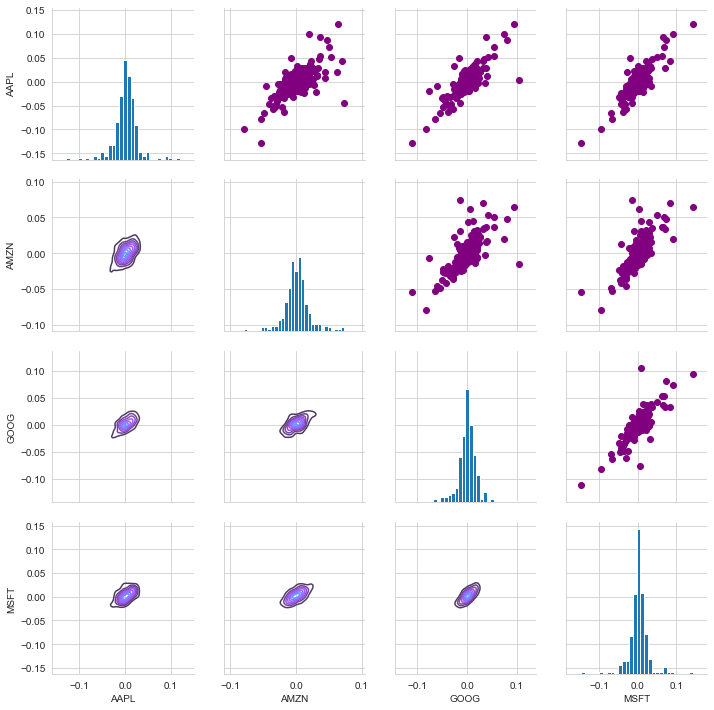

In [41]:
#melakukan modifikasi pairplot, dengan mengubah upper triangle dan lower triangle 
returns_fig = sns.PairGrid(tech_rets.dropna())

#modifikasi upper triangle, diatas diagonal histogram
returns_fig.map_upper(plt.scatter, color='purple')

#modifikasi lower triangle, dibawah diagonal histogram
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

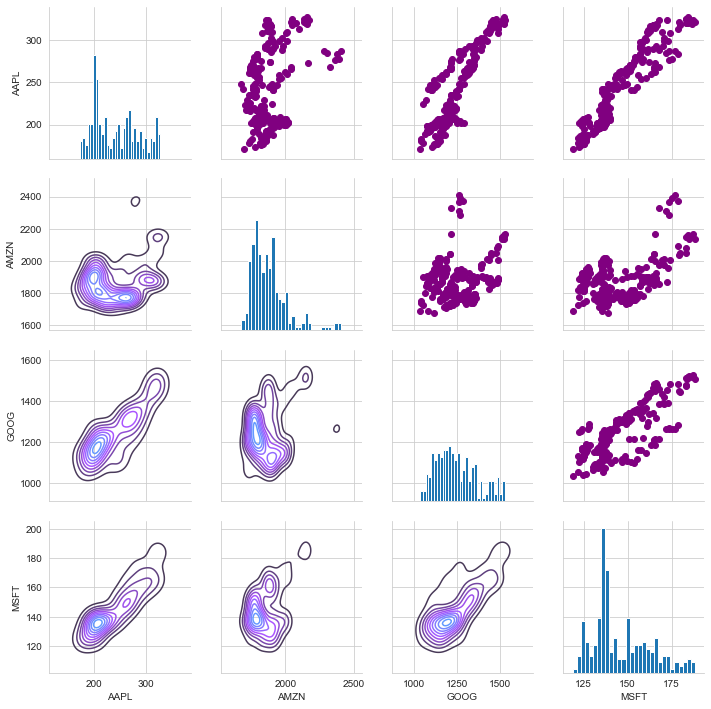

In [42]:
#melihat closing prices

#melakukan modifikasi pairplot, dengan mengubah upper triangle dan lower triangle 
returns_fig = sns.PairGrid(closing_df.dropna())

#modifikasi upper triangle, diatas diagonal histogram
returns_fig.map_upper(plt.scatter, color='purple')

#modifikasi lower triangle, dibawah diagonal histogram
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

In [43]:
#fungsi corrplot sudah deprecated 
#sekarang diganti heatmap, cuma bagaimana melihatnya? 

#alternatif: pake heatmap

#cara seperti ini tetap tidak bisa 
# sns.heatmap(tech_rets.dropna().corr, annot=True)

#pake alternatif kedua: 
# corr=tech_rets.corr()

# mask=np.zeros_like(corr)

# mask[np.triu_indices_from(mask)]=True

# sns.heatmap(corr,annot=True,mask=mask)
#ALTERNATIF KEDUA BERHASIL 

#alternatif ketiga: 
#GAGAL. Error dimananya? 
# sns.heatmap(tech_rets.corr(method='pearson'), 
#             xticklabels=tech_rets.corr(method='pearson').columns, 
#             yticklabels=tech_rets.corr(method='pearson').columns,
#             annot=True)

## Risk Analysis

In [44]:
#quantify risk 
#risk adalah standard deviation dari daily return (?)

#rumusnya adalah comparing expected returns dengan standard deviasi dari daily return 

#new dataframe
rets = tech_rets.dropna()

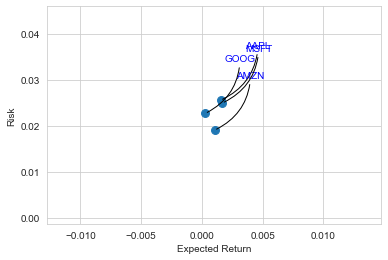

In [45]:
#area digunakan untuk mendefiniskan area dari circle plot
area = np.pi * 20

#x axis adalah mean
#y adalah standard deviasi
plt.scatter(rets.mean(), rets.std(), s = area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

#label the scatter plot using annotation matplotlib
#dokumentasi: http://matplotlib.org/users/annotations_guide.html

#membuat anotasi
#pertama adalah membuat for loop dengan iterasi ke dalam zip
#zip adalah method untuk memanggil beberapa parameter secara bersamaan
for label, x, y in zip(rets.columns, rets.mean(), rets.std()): 
    plt.annotate(
    label,
    xy = (x,y), xytext=(50,50),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3', color= 'black'),
    color='b')
    
#garis berwarna putih
#garis sekarang berwarna hitam, dikarenakan parameter colom di dalam variabel arrowprops 


#saya masih belum tahu kalkulasinya cuma, seharusnya yang kita cari adalah high expected return dan low risk
#dalam hal ini yang paling baik adalah amazon (?)
#microsoft dan apple hampir memiliki nilai expected-risk yang sama 

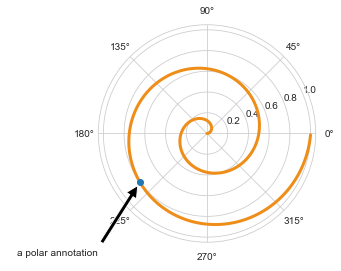

In [46]:
#DILUAR DARI PROJECT
#ini adalah salah satu codingan yang saya copy dari dokumentasi annotation di matplotlib 

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
r = np.arange(0, 1, 0.001)
theta = 2 * 2*np.pi * r
line, = ax.plot(theta, r, color='#ee8d18', lw=3)

ind = 800
thisr, thistheta = r[ind], theta[ind]
ax.plot([thistheta], [thisr], 'o')
ax.annotate('a polar annotation',
            xy=(thistheta, thisr),  # theta, radius
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom',
            )
plt.show()

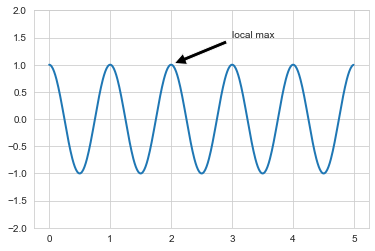

In [47]:
#Contoh annotation yang lain 

fig, ax = plt.subplots()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.set_ylim(-2, 2)
plt.show()

## Value at risk

Value at risk is the amount of money we can expect to lose for a given confidence interval

Ada beberapa cara, yang pertama adalah bootstrap method, kedua adalah monte carlo method

bootstrap method menggunakan cara quantiles

lebih lanjut mengenai quantiles: https://en.wikipedia.org/wiki/Quantile

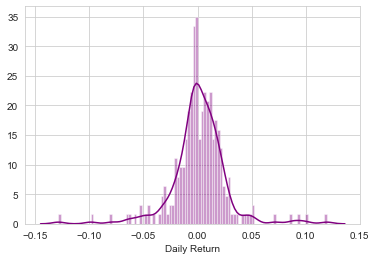

In [48]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [49]:
rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-04-23,0.014423,0.019318,0.012580,0.013575
2019-04-24,-0.001542,-0.011446,-0.006761,-0.003428
2019-04-25,-0.009075,0.000263,0.005931,0.033117
2019-04-26,-0.004774,0.025433,0.006910,0.005730
2019-04-29,0.001517,-0.006254,0.012105,-0.000924


In [50]:
#artinya merupakan 0.05 empirical quantile (?)
rets['AAPL'].quantile(0.05)

# The 0.05 empirical quantile of daily returns is at -0.019. 
# That means that with 95% confidence, our worst daily loss will not exceed 1.9%. 
# If we have a 1 million dollar investment, our one-day 5% VaR is 0.019 * 1,000,000 = $19,000.

#apa kegunaan convidence interval? apa itu empirical quantile? ini semua ada di statistik, yang tidak saya mengerti/lupa

-0.034215511527353734

## Value at Risk using Monte Carlo method

In [51]:
# link mengenai penjelasan brief mengenai monte carlo method: https://nbviewer.jupyter.org/github/jmportilla/Udemy-notes/blob/master/Data%20Project%20-%20Stock%20Market%20Analysis.ipynb
# ada yang namanya drift dan ada yang namanya shock 
# drift digunakan sebagai sumbu (?) shock adalah penggerak, entah ke atas atau ke bawah 
days = 365

dt = 1/days

#expected return
mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [52]:
#jika ingin mengetahui rumus lebih lanjut, bisa melihat di: https://www.investopedia.com/articles/07/montecarlo.asp

def stock_monte_carlo(start_price, days, mu, sigma):
    
    #array of zeros with same length as days
    price = np.zeros(days)
    #array pertama diawali dengan start_price yang di-define di awal parameter 
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    #setiap kali kita go along 
    for x in range(1, days):
        #kita akan melakukan kalkulasi 
        
        #dari shock x akan mengambil dari distribusi normal (?) dengan scalenya adalah sigma dikali akar dari delta t (?)
        #kalau bingung np.random.normal, bisa cek appendix B
        #rumus dari scale, kurang epsilon. kemudian, apa itu epsilon? 
        #tutornya tidak memasukkan epsilon tapi dia menyamakan epsilon denga normal distribution yang didefinisikan oleh scale 
        shock[x] = np.random.normal(loc= mu*dt, scale= sigma*np.sqrt(dt))
        
        #drift memang rumus dari drift
        drift[x] = mu * dt 
        
        #jika ingin menghitung price, mengapa price[x-1] dihitung dua kali (?)
        #mungkin memang dua kali karena kan ditambah2 terus? 
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [53]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-22,1249.089966,1228.310059,1235.989990,1248.839966,807300,1248.839966
2019-04-23,1269.000000,1246.380005,1250.689941,1264.550049,1319900,1264.550049
2019-04-24,1268.010010,1255.000000,1264.119995,1256.000000,1018800,1256.000000
2019-04-25,1267.407959,1252.030029,1264.770020,1263.449951,1107300,1263.449951
2019-04-26,1273.069946,1260.319946,1269.000000,1272.180054,1241400,1272.180054


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

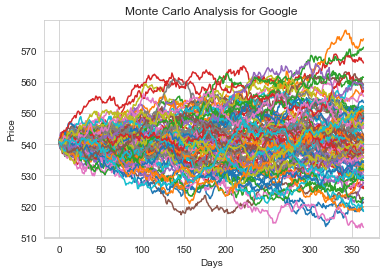

In [54]:
start_price = 540.74

#jalankan monte carlo simulation sebanyak 100 kali
for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

#simulasi 100 kali random trials dari saham Google 

In [56]:
#menjalankan trial sebanyak 10000

runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    #setiap run di setiap simulasi akan didefinisikan sebagai kalkulasi pada hari sebelumnya? 
    #stock_monte_carlo itu memiliki tipe data apa?
    
    #days-1 artinya selalu mengambil index ke 364, atau menurut tutor adalah end price
    #mengapa end price? 
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]
    
    #kalau kita memanggil stock_monte_carlo(start_price, days, mu, sigma) saja, maka akan mengembalikkan array
    #array apa? array dari price sebanyak 365, atau sebanyak days

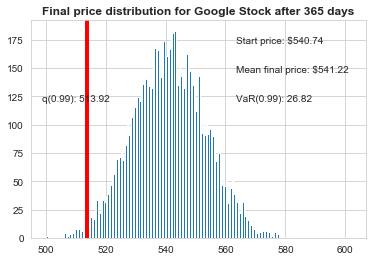

In [59]:
#menggunakan quantile dan histogram
#using 1 sebagai 1% empirical quantile?

#apa itu empirical quantile?
q = np.percentile(simulations, 1)

plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

#Starting price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

#Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): %.2f" % (start_price - q,))

#display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): %.2f" % q)

#plot a line at the 1% quantile result 
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

#amount of money yang mungkin hilang 99% of the time maximum hanya sebanyak 26.82 dari start price sebesar 540.74 

In [ ]:
#ADA BEBERAPA PERTANYAAN YANG BELUM TERJAWAB. AKAN DIJAWAB SETELAH MENYELESAIKAN APPENDIX